In [1]:
# Example from Programming Collective Intelligence, Chapter 10

### News analysis ###

In [2]:
from newsfeatures import *
from docclass import *

feedlist = ['http://feeds.reuters.com/reuters/topNews',
            'http://feeds.reuters.com/Reuters/domesticNews',
            'http://feeds.reuters.com/Reuters/worldNews',
            'http://hosted2.ap.org/atom/APDEFAULT/3d281c11a96b4ad082fe88aa0db04305',
            'http://hosted2.ap.org/atom/APDEFAULT/386c25518f464186bf7a2ac026580ce7',
            'http://hosted2.ap.org/atom/APDEFAULT/cae69a7523db45408eeb2b3a98c0c9c5',
            'http://hosted2.ap.org/atom/APDEFAULT/89ae8247abe8493fae24405546e9a1aa',
            'http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml',
            'http://www.nytimes.com/services/xml/rss/nyt/International.xml',
            'http://news.google.com/?output=rss',
            'http://feeds.salon.com/salon/news',
            'http://www.foxnews.com/xmlfeed/rss/0,4313,0,00.rss',
            'http://www.foxnews.com/xmlfeed/rss/0,4313,80,00.rss',
            'http://www.foxnews.com/xmlfeed/rss/0,4313,81,00.rss',
            'http://rss.cnn.com/rss/edition.rss',
            'http://rss.cnn.com/rss/edition_world.rss',
            'http://rss.cnn.com/rss/edition_us.rss']

Read feeds and extract words from articles in this feed:

In [3]:
allw,artw,artt= getarticlewords(feedlist)

Parsing feed http://feeds.reuters.com/reuters/topNews, # of entries: 10
Parsing feed http://feeds.reuters.com/Reuters/domesticNews, # of entries: 10
Parsing feed http://feeds.reuters.com/Reuters/worldNews, # of entries: 10
Parsing feed http://hosted2.ap.org/atom/APDEFAULT/3d281c11a96b4ad082fe88aa0db04305, # of entries: 5
Parsing feed http://hosted2.ap.org/atom/APDEFAULT/386c25518f464186bf7a2ac026580ce7, # of entries: 5
Parsing feed http://hosted2.ap.org/atom/APDEFAULT/cae69a7523db45408eeb2b3a98c0c9c5, # of entries: 5
Parsing feed http://hosted2.ap.org/atom/APDEFAULT/89ae8247abe8493fae24405546e9a1aa, # of entries: 3
Parsing feed http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml, # of entries: 30
Parsing feed http://www.nytimes.com/services/xml/rss/nyt/International.xml, # of entries: 32
Parsing feed http://news.google.com/?output=rss, # of entries: 10
Parsing feed http://feeds.salon.com/salon/news, # of entries: 0
Parsing feed http://www.foxnews.com/xmlfeed/rss/0,4313,0,00.rss, #

Create "article-word" matrix:

In [6]:
wordmatrix, wordvec = makematrix(allw,artw)
print wordvec[0:10]
print artt[1]

['protest', 'paris', 'under', 'school', 'second', 'even', 'brexit', 'told', 'human', 'china']
Fate of Obama legacy initiatives in hands of courts, successor


Create Bayesian classifier:

In [10]:
def wordmatrixfeatures(x):
    return [wordvec[w] for w in range(len(x)) if x[w]>0]

classifier=naivebayes(wordmatrixfeatures)
classifier.setdb('newstest.db')
print artt[0]
# Train this as an 'iraq' story
classifier.train(wordmatrix[0],'Trump')
print artt[1]
classifier.train(wordmatrix[1],'Obama')
print artt[2]

Clinton, Trump clash over economy in final campaign stretch
Fate of Obama legacy initiatives in hands of courts, successor
Dependent on migrant dollars, rural Mexico prays for Trump defeat


How is 'Obama' story classified?

In [11]:
classifier.classify(wordmatrix[1])

u'Obama'

Perform clustering and draw dendrogram:

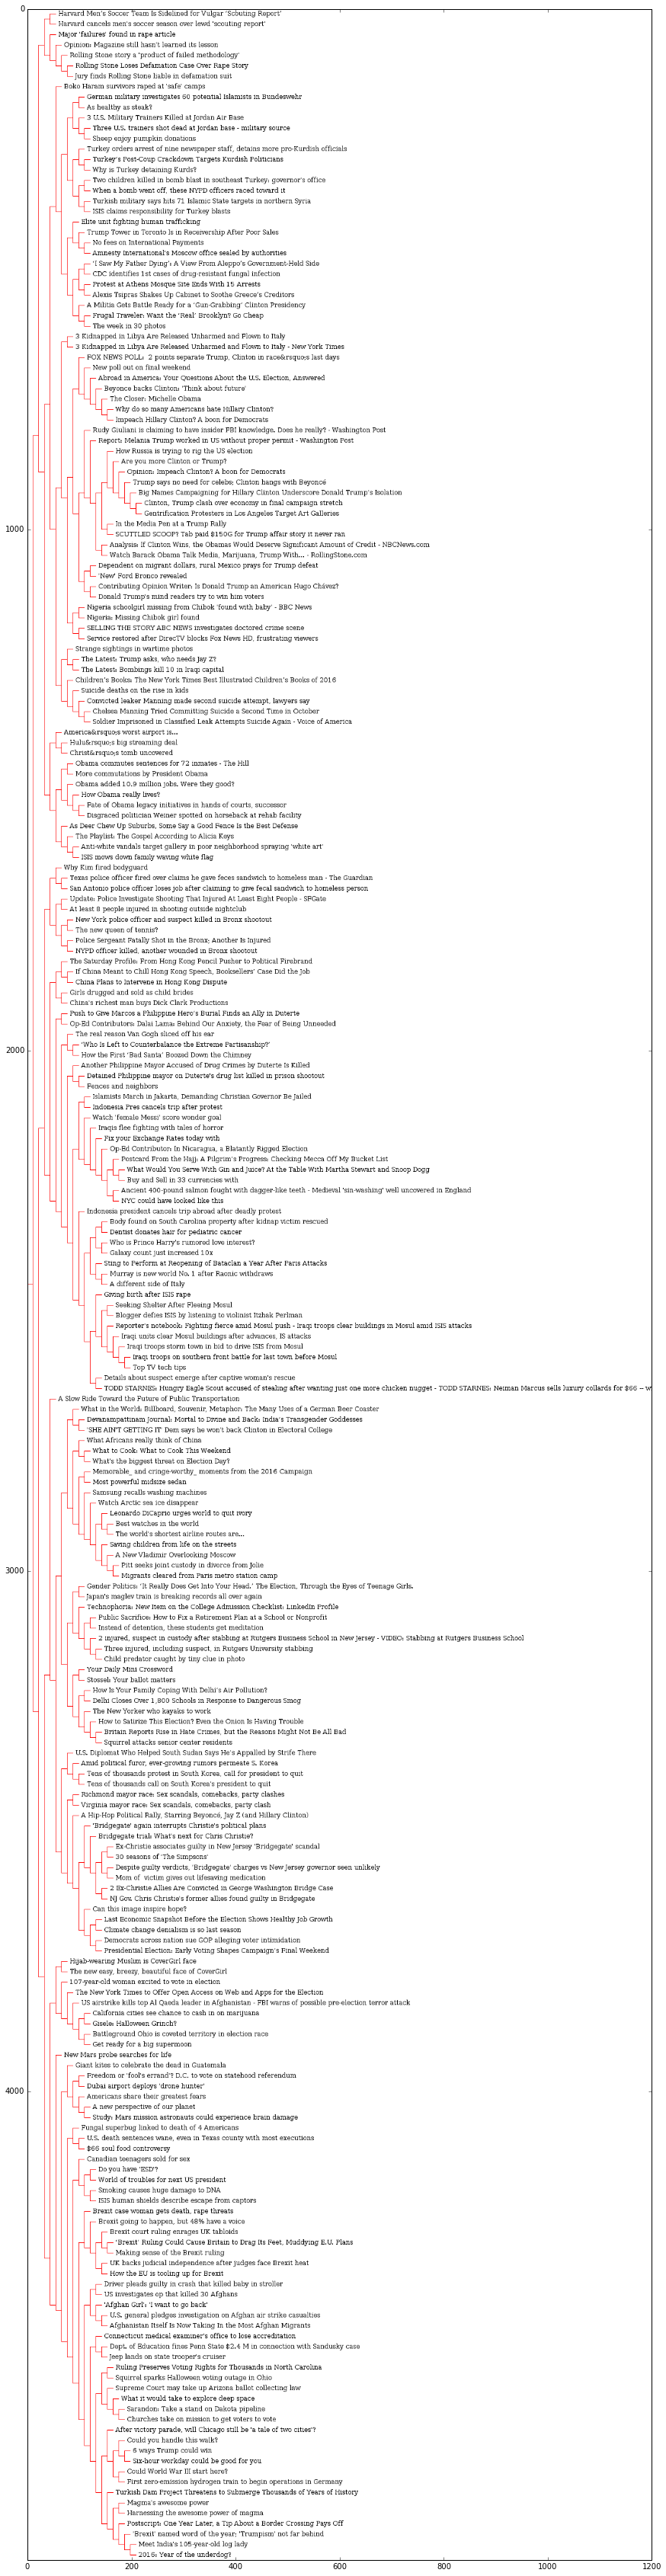

In [13]:
%matplotlib inline
import sys
sys.path.insert(0, '../clustering')
from clusters import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

clust = hcluster(wordmatrix)
img = drawdendrogram(clust,artt)
fig2 = plt.figure(figsize = (20,60))
ax3 = fig2.add_subplot(111)
ax3.imshow(img)
plt.show()
img.save('news.jpg', 'JPEG')

Apply NNMF algorithm and show features:

In [14]:
v = matrix(wordmatrix)
# import nnmf           # Numerical problems!
# weights,feat=nnmf.factorize(v,pc=20,iter=20)
from sklearn.decomposition import NMF
model = NMF(n_components=20, init='random', random_state=0)
weights = model.fit_transform(v);
feat = model.components_;

Extract features:

In [21]:
topp,pn = showfeatures(weights,feat,artt,wordvec)
print(topp[0])
print(pn)

[(0.0, 0, u'Clinton, Trump clash over economy in final campaign stretch'), (0.014642160632889385, 1, u'Clinton, Trump clash over economy in final campaign stretch'), (0.17900801378930786, 2, u'Clinton, Trump clash over economy in final campaign stretch'), (0.0, 3, u'Clinton, Trump clash over economy in final campaign stretch'), (0.055823088503751249, 4, u'Clinton, Trump clash over economy in final campaign stretch'), (0.036061099010041543, 5, u'Clinton, Trump clash over economy in final campaign stretch'), (1.0642514944155397, 6, u'Clinton, Trump clash over economy in final campaign stretch'), (0.15152019968566668, 7, u'Clinton, Trump clash over economy in final campaign stretch'), (0.0, 8, u'Clinton, Trump clash over economy in final campaign stretch'), (0.0, 9, u'Clinton, Trump clash over economy in final campaign stretch'), (0.065800464085797622, 10, u'Clinton, Trump clash over economy in final campaign stretch'), (0.027393765738750214, 11, u'Clinton, Trump clash over economy in fin

Show articles:

In [22]:
print(showarticles(artt,topp,pn))

None
